In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("C:\\Users\\91923\\Downloads\\seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<AxesSubplot:xlabel='date', ylabel='precipitation'>

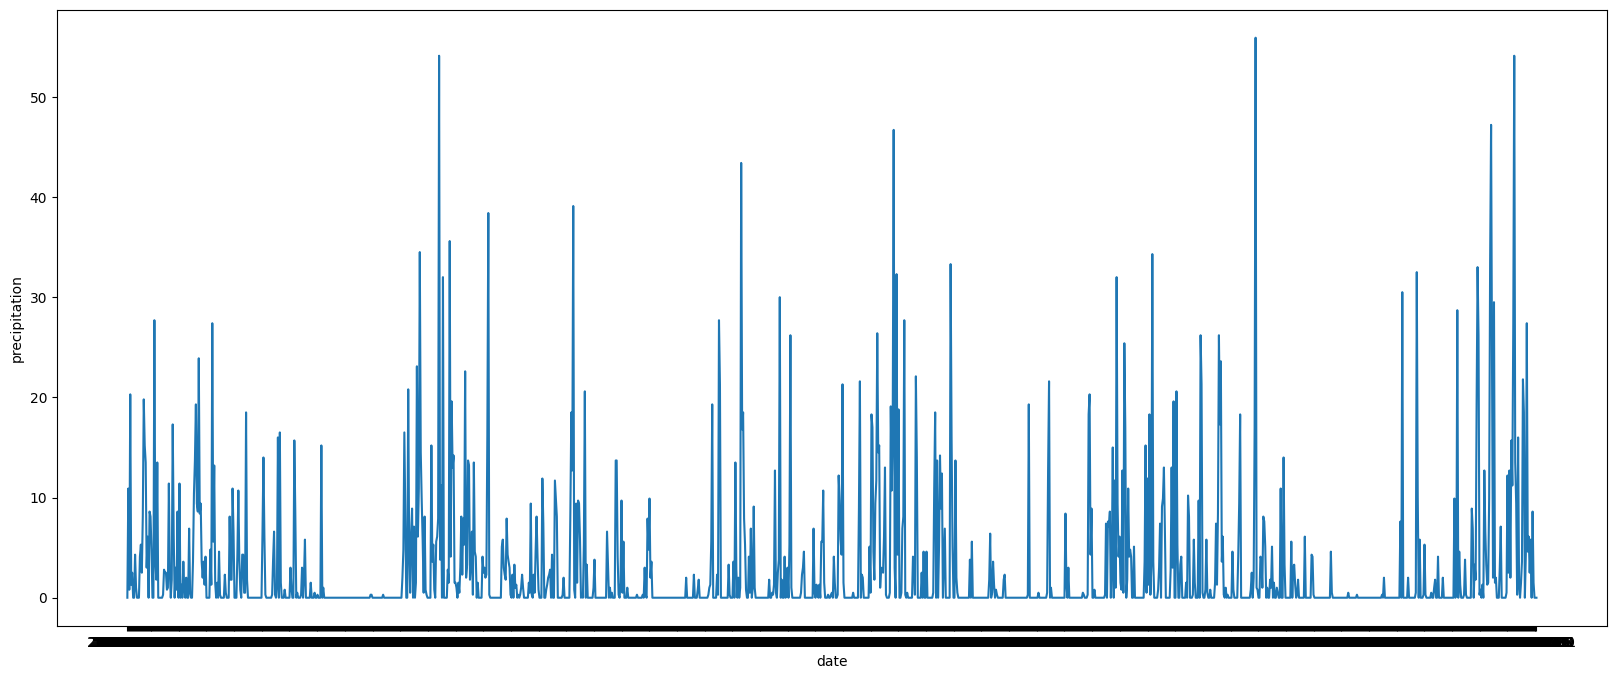

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x='date',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='date', ylabel='wind'>

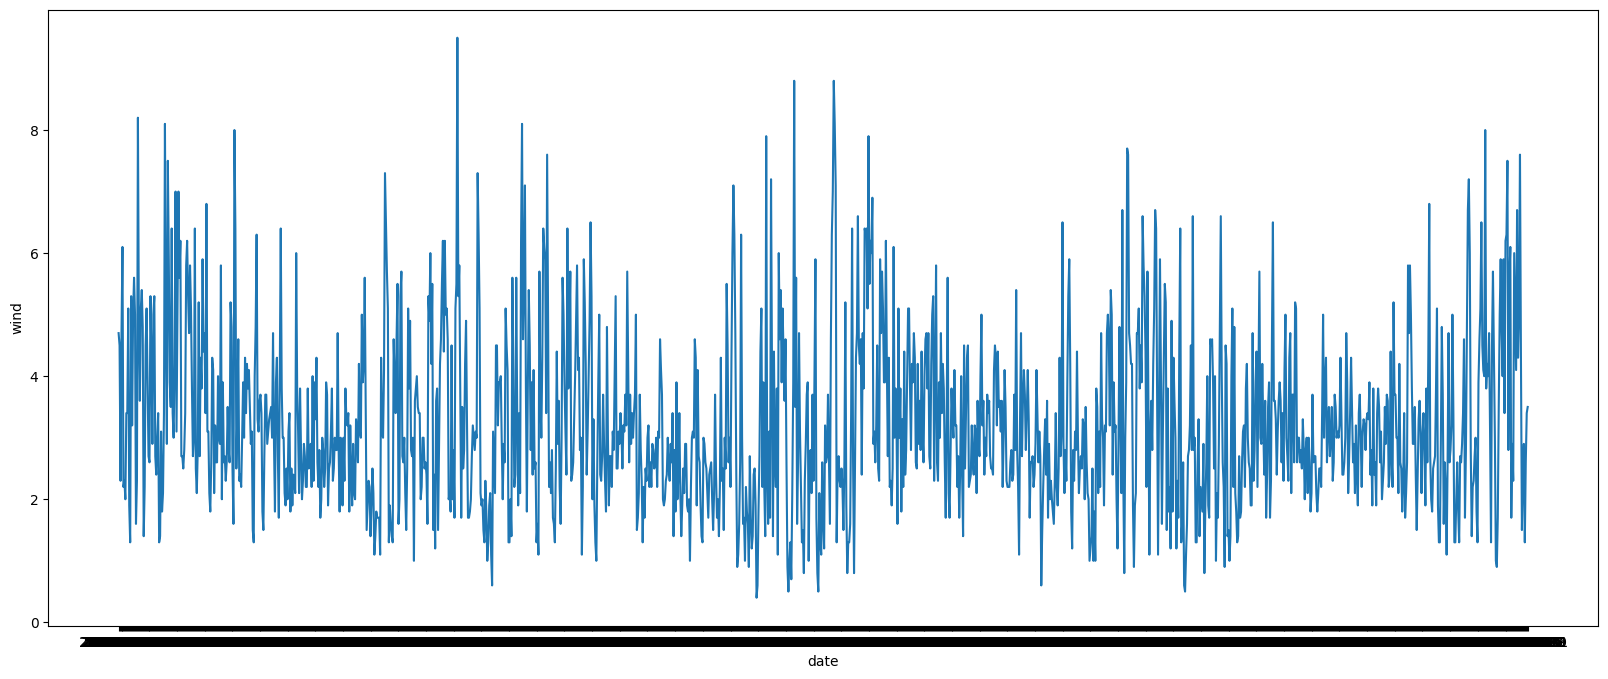

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x='date',y='wind',data=df,ax=ax)

<AxesSubplot:xlabel='temp_max', ylabel='precipitation'>

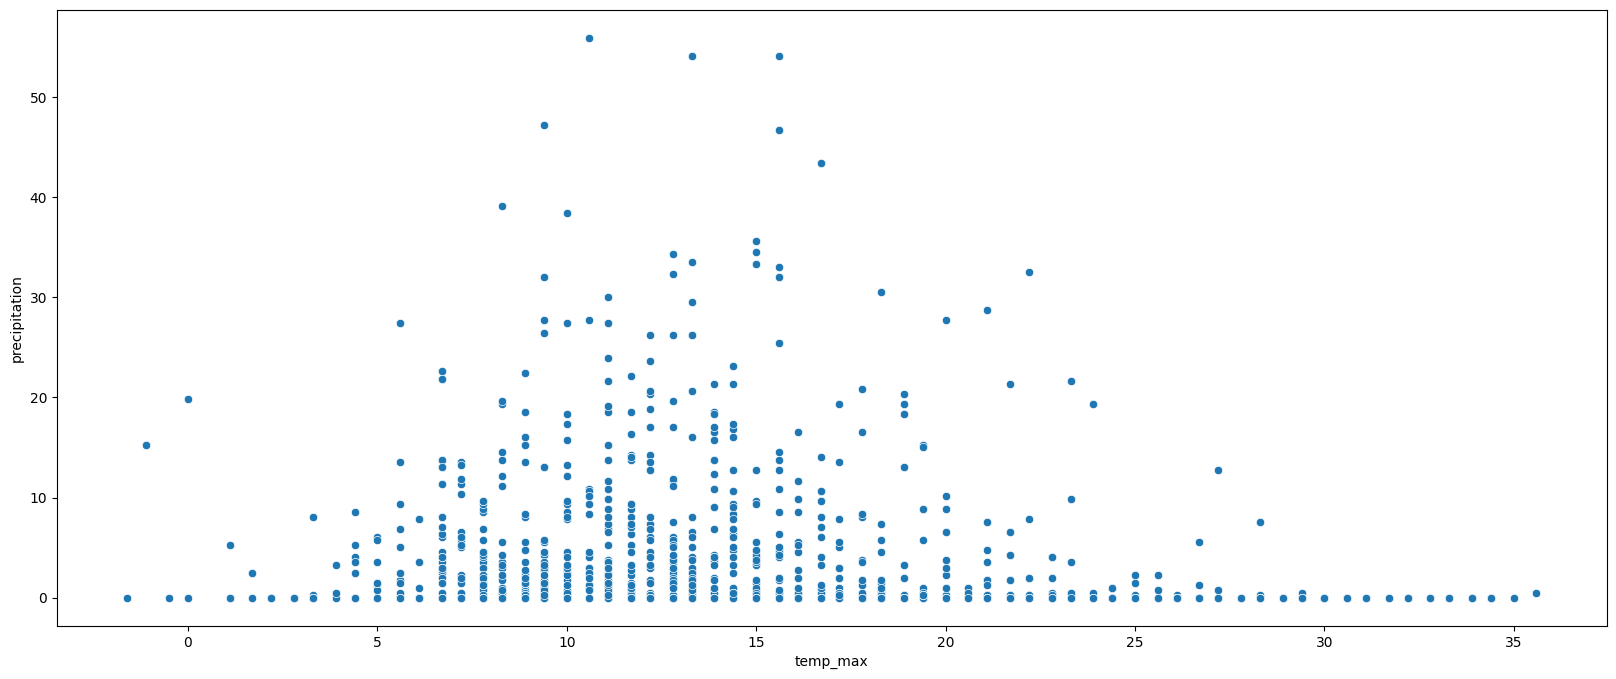

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x='temp_max',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='temp_min', ylabel='precipitation'>

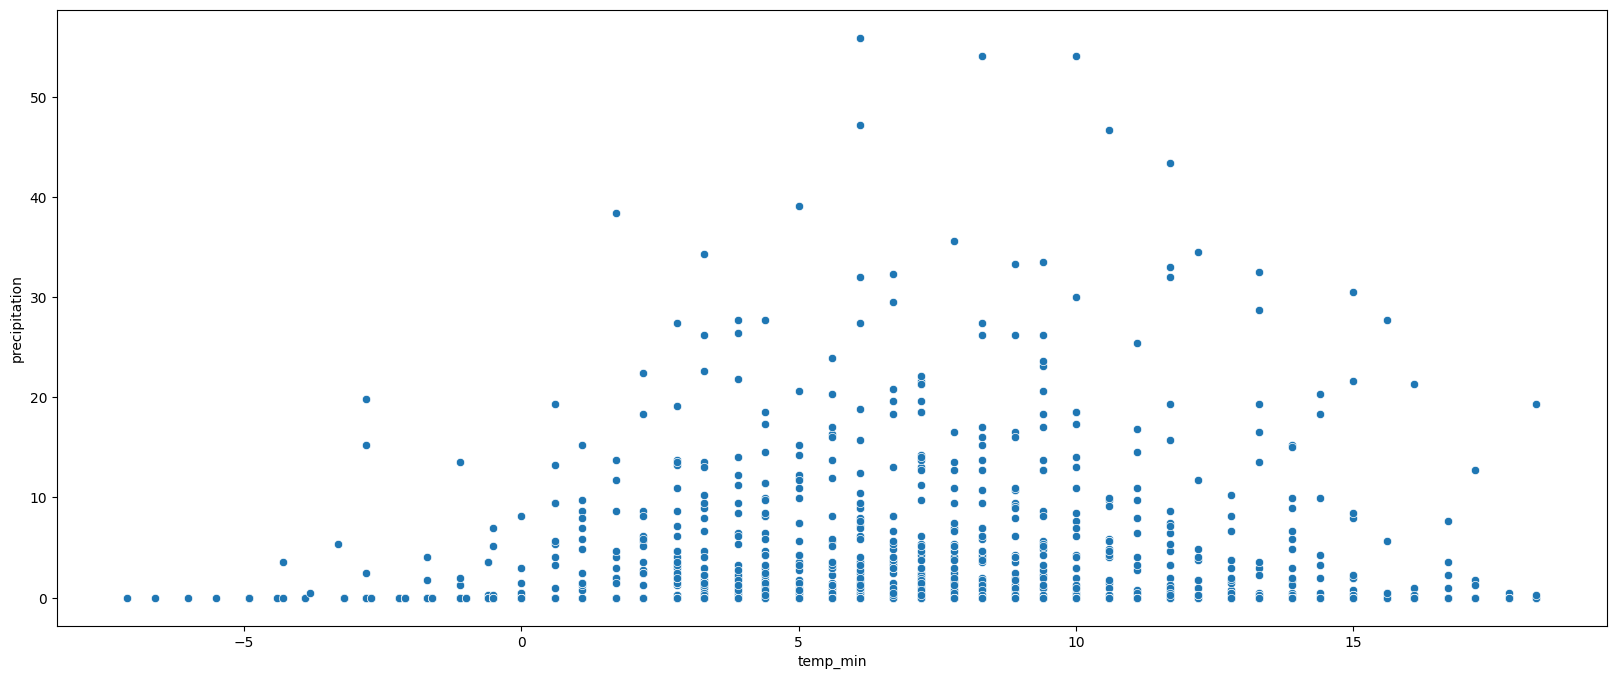

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x='temp_min',y='precipitation',data=df,ax=ax)

<AxesSubplot:xlabel='weather', ylabel='temp_max'>

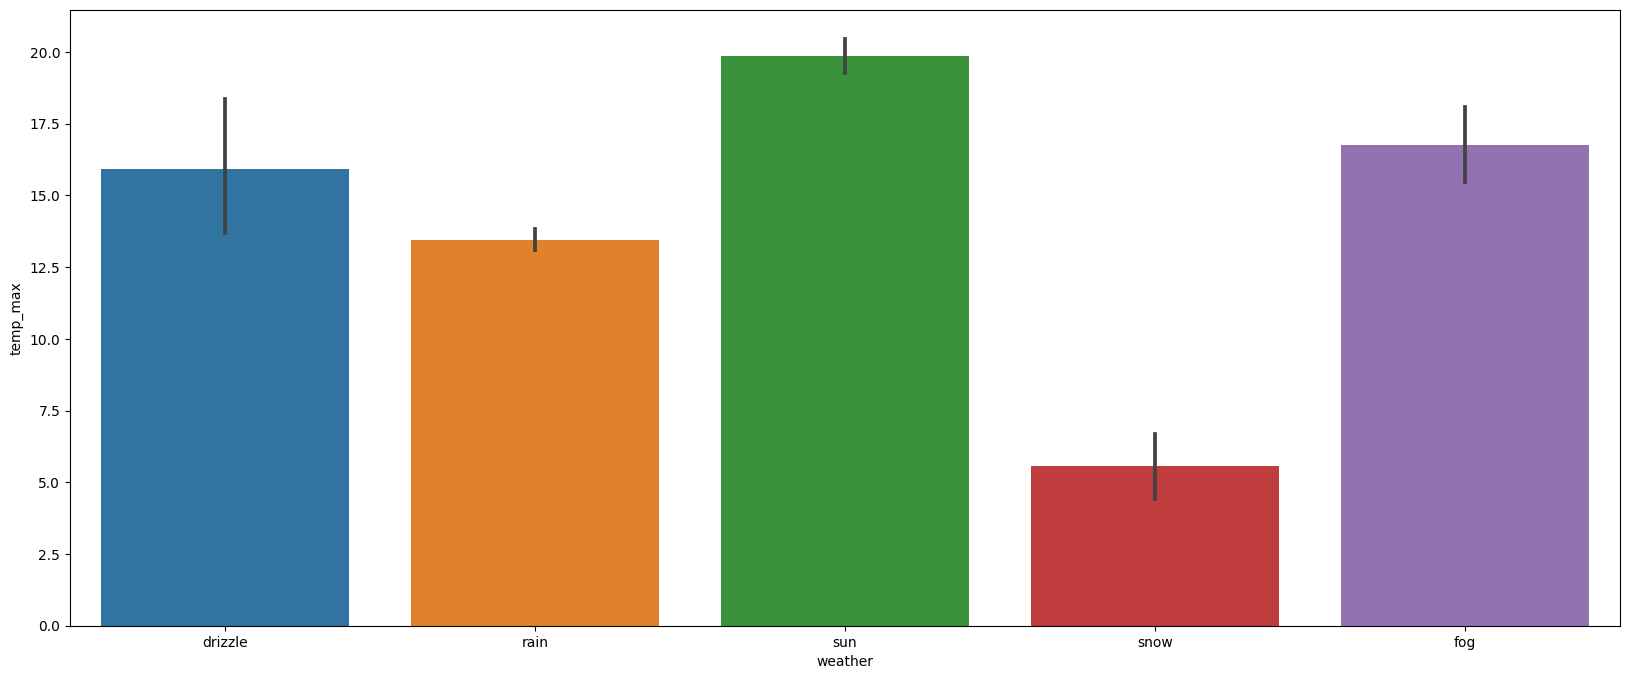

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='temp_max',data=df,ax=ax)

<AxesSubplot:xlabel='weather', ylabel='temp_min'>

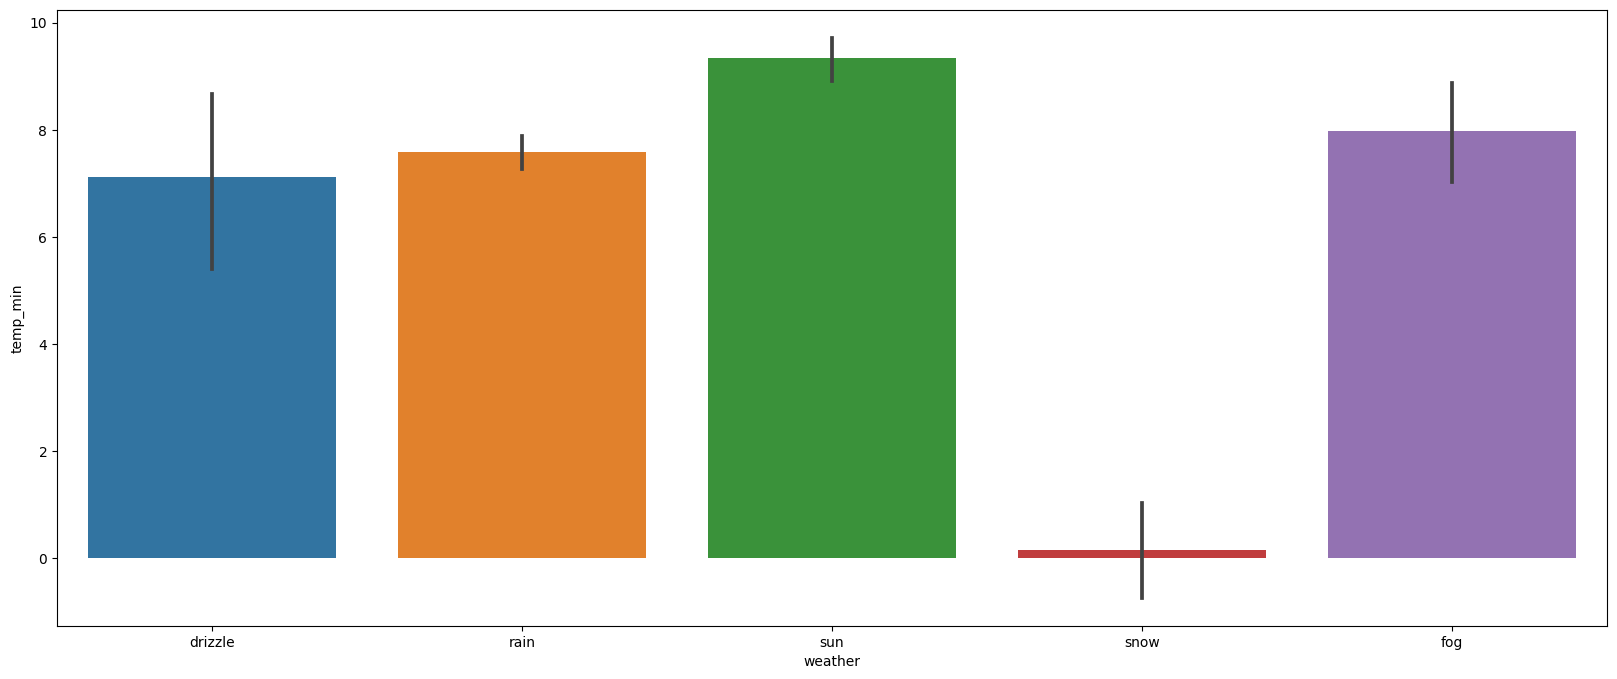

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='temp_min',data=df,ax=ax)

In [10]:
l = LabelEncoder()
df['weather']=l.fit_transform(df['weather'])
df['weather']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [11]:
x=df.drop(['date','weather'],axis=1)
y=df['weather']
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [12]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [13]:
rfc.score(xtest,ytest)

0.825938566552901

In [14]:
rfc2 = cross_val_score(estimator = rfc, X = xtrain, y = ytrain, cv = 10)
rfc2.mean()

0.839080459770115

In [15]:
index=df[df['weather']==0].index
df1 = df.drop(index=index,axis=0)
df1['weather']

1       2
2       2
3       2
4       2
5       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1408, dtype: int32

In [16]:
index=df1[df1['weather']==1].index
df1 = df1.drop(index=index,axis=0)
df1['weather']

1       2
2       2
3       2
4       2
5       2
       ..
1455    4
1456    2
1457    2
1459    4
1460    4
Name: weather, Length: 1307, dtype: int32

In [17]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [18]:
rfc.score(xtest,ytest)

0.8122866894197952

<AxesSubplot:>

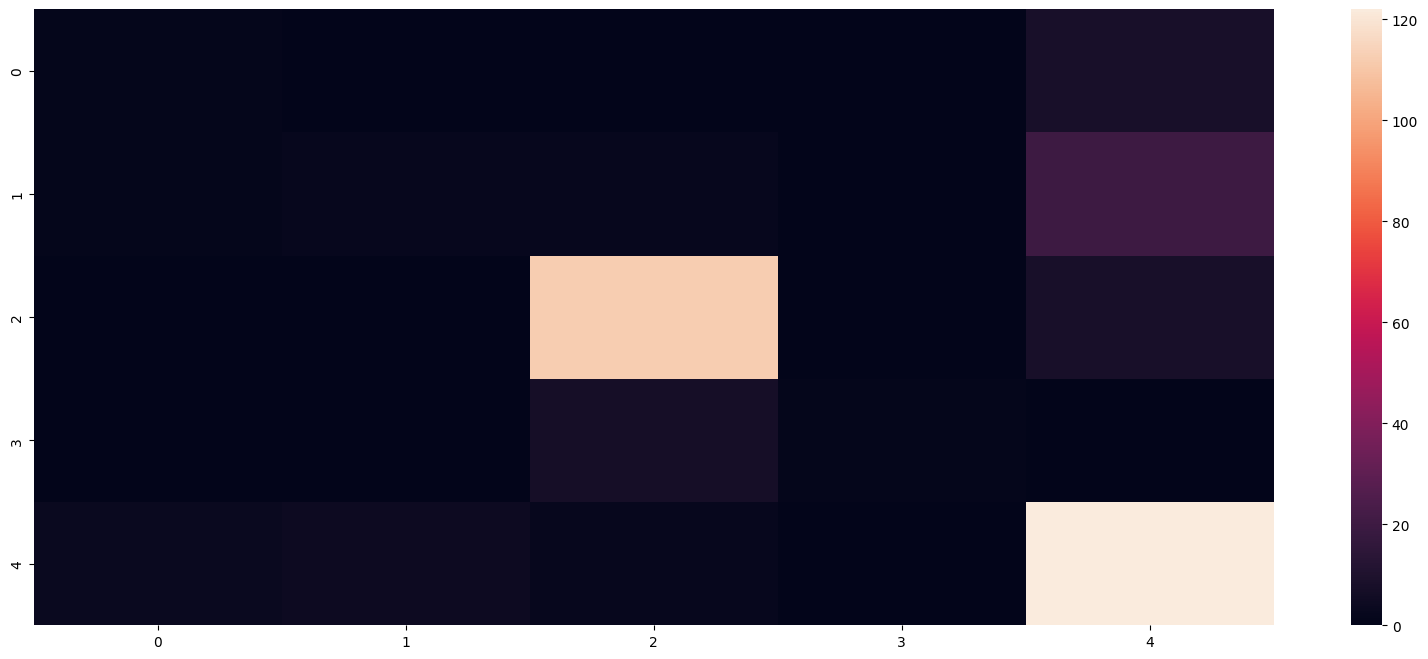

In [19]:
yp = rfc.predict(xtest)
c=confusion_matrix(ytest,yp)
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(c,ax=ax)